In [1]:
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os
import glob
from os.path import expanduser
import datetime
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.patches as mpatches
from TUG_classes import *
from report_creation import *


## Dati anagrafici 

In [12]:
today_date = datetime.today().strftime("%d %b %Y")
today_date = 'not available'
saveFigReport = True

in_cut = False
time2cut = 50

In [13]:
subj = 2
trial = 4

In [14]:
home = expanduser("~")
#data_path = '/home/carmela/dev_iit/assistive-rehab/data_exp_1ses/experimentData/subj_' + str(subj) + '/tr_' + str(trial)  
data_path = '/home/r1-user/etapas-results/motion-analysis/'
#pth = os.path.join(home,data_path)
pth = data_path
#lastfile = os.path.join(pth,'data.mat')
lastfile = os.path.join(data_path,'user-#16-tug-7.mat')
data = []
data.append(loadmat(lastfile))

In [15]:
time = []

for i in range(len(data)):

    datai = data[i]

    if in_cut:
        time.append(datai['Time_samples'][time2cut:])
        shoulderCenter = datai['Keypoints']['shoulderCenter'][time2cut:,:]
        head = datai['Keypoints']['head'][time2cut:]
        shoulderLeft = datai['Keypoints']['shoulderLeft'][time2cut:]
        shoulderRight = datai['Keypoints']['shoulderRight'][time2cut:]
        elbowLeft = datai['Keypoints']['elbowLeft'][time2cut:]
        handLeft = datai['Keypoints']['handLeft'][time2cut:]
        elbowRight = datai['Keypoints']['elbowRight'][time2cut:]
        handRight = datai['Keypoints']['handRight'][time2cut:]
        hipLeft = datai['Keypoints']['hipLeft'][time2cut:]
        hipRight = datai['Keypoints']['hipRight'][time2cut:]
        ankleLeft = datai['Keypoints']['ankleLeft'][time2cut:]
        ankleRight = datai['Keypoints']['ankleRight'][time2cut:]
        kneeLeft = datai['Keypoints']['kneeLeft'][time2cut:]
        kneeRight = datai['Keypoints']['kneeRight'][time2cut:]
        footLeft = datai['Keypoints']['footLeft'][time2cut:]
        footRight = datai['Keypoints']['footRight'][time2cut:]
        hipCenter = datai['Keypoints']['hipCenter'][time2cut:]
    else:
        time.append(datai['Time_samples'])
        shoulderCenter = datai['Keypoints']['shoulderCenter']
        head = datai['Keypoints']['head']
        shoulderLeft = datai['Keypoints']['shoulderLeft']
        shoulderRight = datai['Keypoints']['shoulderRight']
        elbowLeft = datai['Keypoints']['elbowLeft']
        handLeft = datai['Keypoints']['handLeft']
        elbowRight = datai['Keypoints']['elbowRight']
        handRight = datai['Keypoints']['handRight']
        hipLeft = datai['Keypoints']['hipLeft']
        hipRight = datai['Keypoints']['hipRight']
        ankleLeft = datai['Keypoints']['ankleLeft']
        ankleRight = datai['Keypoints']['ankleRight']
        kneeLeft = datai['Keypoints']['kneeLeft']
        kneeRight = datai['Keypoints']['kneeRight']
        footLeft = datai['Keypoints']['footLeft']
        footRight = datai['Keypoints']['footRight']
        hipCenter = datai['Keypoints']['hipCenter']

    key_pam = {
        "shoulderCenter" : shoulderCenter,
        "head" : head,
        "shoulderLeft" : shoulderLeft,
        "shoulderRight" : shoulderRight,
        "elbowLeft" : elbowLeft,
        "handLeft" : handLeft,
        "elbowRight" : elbowRight,
        "handRight" : handRight,
        "hipLeft" : hipLeft,
        "hipRight" : hipRight,
        "ankleLeft" : ankleLeft,
        "ankleRight" : ankleRight,
        "kneeLeft" : kneeLeft,
        "kneeRight" : kneeRight,
        "footLeft" : footLeft,
        "footRight" : footRight,
        "hipCenter" : hipCenter
    }
    s=Skeleton(key_pam)

    samp2cut= 50
    in_stand_idx, in_wf_idx, fin_wf_idx, fin_turn1_idx, fin_wb_idx, fin_turn2_idx, fin_sit_idx = compute_timing(s, samp2cut)

    allmet = datai["Exercise"]["metrics"]
    #flt = allmet['step_0']["median_filter_window"]
    flt = 4
    proj = True
    tstanding = time[0][in_stand_idx]
    tforward = time[0][in_wf_idx]
    tturning1 = time[0][fin_wf_idx]
    tbackward = time[0][fin_turn1_idx]
    tturning2 = time[0][fin_wb_idx]
    tsitting = time[0][fin_turn2_idx]
    tend = time[0][fin_sit_idx]
    step_thresh = 0.25 #minimum distance between ankles to identify a step
    durata = samp2cut #amount of samples to identify resting phase TODO:change variable name
    step = Step(flt, proj, tstanding, tforward, tturning1, tbackward, tturning2, tsitting, tend, step_thresh, durata)
    step.compute(s, subj, trial, pth)
    stepmet = [step.step_distance, step.nsteps, step.cadence, step.speed, step.speed_z, step.walking_time, step.ex_time,
                step.filtered_step_distance, step.strikes, step.step_width, step.step_length]

table_tug = pd.DataFrame([['Normale mobilità'],['Buona mobilita'],['Ausili cammino'],['Rischio caduta']],
            index=['< 10 s','< 20 s','< 30 s','>= 30 s'],
            columns=['Tabella TUG'])
display(table_tug)

time_score = tend-tstanding
print("Il test è stato svolto in",round(time_score,2),"s")
if time_score < 10:
    evaluation = 'Normale mobilità'
    print("La valutazione è [1;30;42m",evaluation)
elif time_score < 20:
    evaluation = 'Buona mobilità, non necessita ausili'
    print("La valutazione è [1;30;42m",evaluation)
elif time_score < 30:
    evaluation = 'Necessita ausili cammino'
    print("La valutazione è [1;30;43m",evaluation)
elif time_score >= 30:
    evaluation = 'Rischio caduta'
    print("La valutazione è [1;30;41m",evaluation)

5
110
105
5
110
105


PermissionError: [Errno 13] Permission denied: '/home/r1-user/etapas-results/motion-analysis/metrics.pkl'

In [16]:
print(time[0][in_stand_idx])
print(time[0][in_wf_idx])
print(time[0][fin_wf_idx])
print(time[0][fin_turn1_idx])
print(time[0][fin_wb_idx])
print(time[0][fin_turn2_idx])
print(time[0][fin_sit_idx])



4660.48295545578
4660.983196258545
4663.2849225997925
4664.588575839996
4667.291713237762
4667.491720199585
4668.389082193375


In [17]:
# import pandas
# ts = pd.Series(hipCenter[:,2])
# print(np.std(shoulderCenter[:50,2]))
# print(np.std(hipCenter[:50,2]))

# ts.rolling(window=50).std().plot(style='b')

In [18]:
align_len=min(len(time[0]),len(shoulderCenter[:,1]))

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'Shoulder/hip center (z-dim) [m]')]

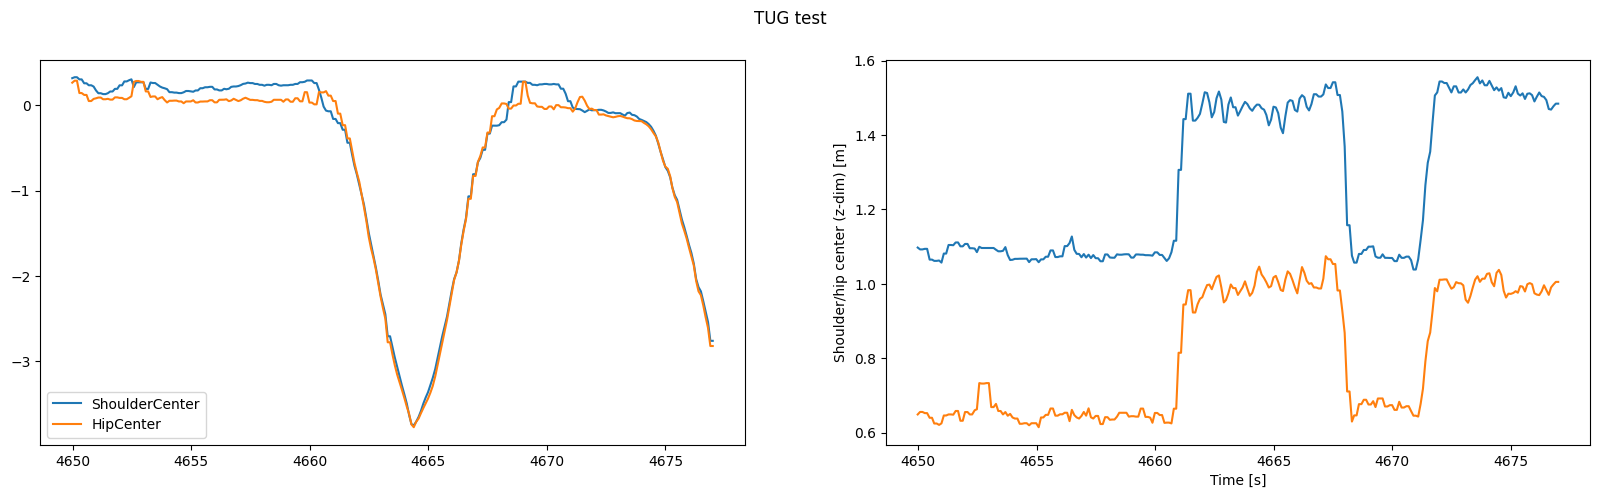

In [19]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
fig.suptitle('TUG test')
axs[0].plot(time[0][:align_len-1], shoulderCenter[:align_len-1,1], label ='ShoulderCenter')
axs[0].plot(time[0][:align_len-1], hipCenter[:align_len-1,1], label ='HipCenter')
axs[0].legend()

	
axs[1].plot(time[0][:align_len-1], shoulderCenter[:align_len-1,2], label ='ShoulderCenter')
axs[1].plot(time[0][:align_len-1], hipCenter[:align_len-1,2], label ='HipCenter')
axs[1].set(xlabel='Time [s]', ylabel='Shoulder/hip center (z-dim) [m]')

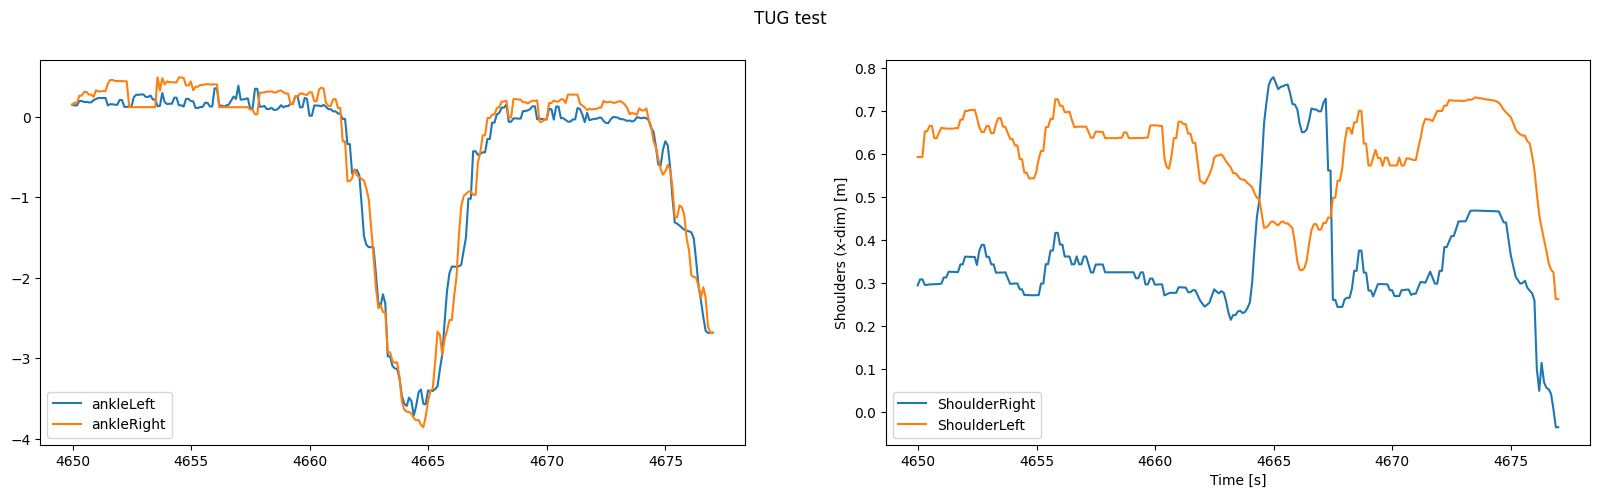

In [20]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
fig.suptitle('TUG test')
axs[0].plot(time[0][:align_len-1], ankleLeft[:align_len-1,1], label ='ankleLeft')
axs[0].plot(time[0][:align_len-1], ankleRight[:align_len-1,1], label ='ankleRight')
axs[0].legend()

	
axs[1].plot(time[0][:align_len-1], shoulderRight[:align_len-1,0], label ='ShoulderRight')
axs[1].plot(time[0][:align_len-1], shoulderLeft[:align_len-1,0], label ='ShoulderLeft')
axs[1].set(xlabel='Time [s]', ylabel='Shoulders (x-dim) [m]')
axs[1].legend()

PermissionError: [Errno 13] Permission denied: '/home/r1-user/etapas-results/motion-analysis//TUG_phases_analysis.png'

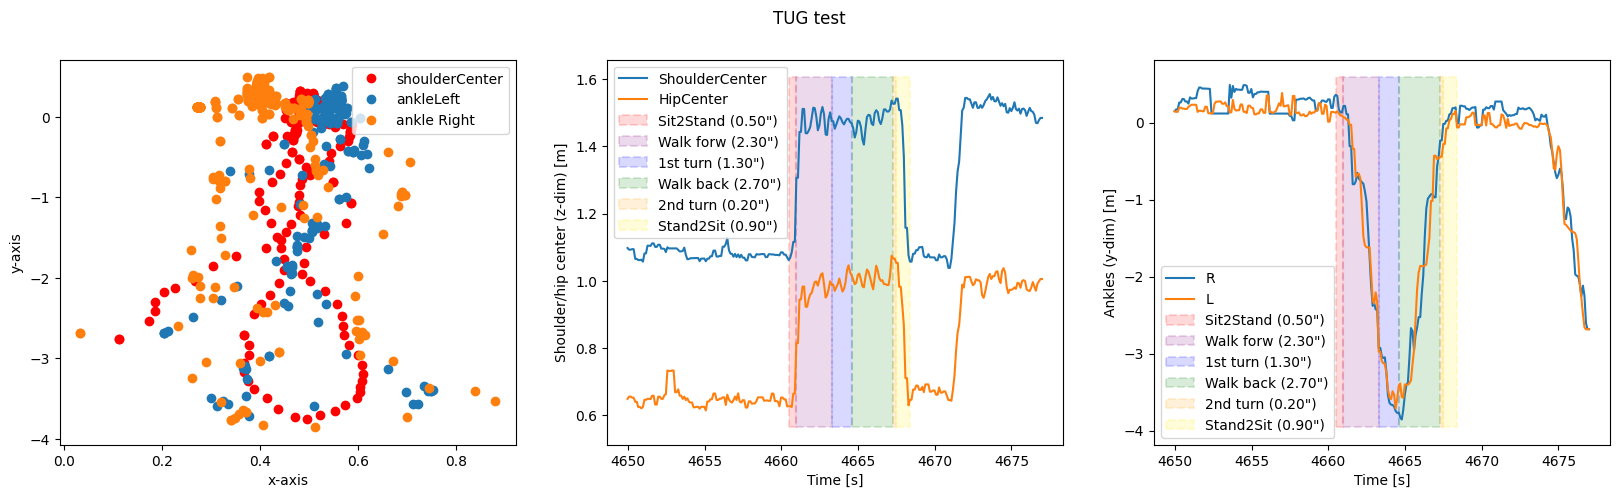

In [21]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))
fig.suptitle('TUG test')
axs[0].plot(shoulderCenter[:align_len-1,0], shoulderCenter[:align_len-1,1],'ro',label= 'shoulderCenter')
axs[0].plot(ankleLeft[:align_len-1,0], ankleLeft[:align_len-1,1],'o',label= 'ankleLeft')
axs[0].plot(ankleRight[:align_len-1,0], ankleRight[:align_len-1,1],'o',label= 'ankle Right')
axs[0].set(xlabel='x-axis', ylabel='y-axis')
axs[0].legend()

	
axs[1].plot(time[0][:align_len-1], shoulderCenter[:align_len-1,2], label ='ShoulderCenter')
axs[1].plot(time[0][:align_len-1], hipCenter[:align_len-1,2], label ='HipCenter')
axs[1].set(xlabel='Time [s]', ylabel='Shoulder/hip center (z-dim) [m]')
#bottom_point= 0.5
#height_val = 1.2
bottom_point = min(hipCenter[:align_len-1,2])-0.05
height_val = max(shoulderCenter[:align_len-1,2])-min(hipCenter[:align_len-1,2])+0.1
left, bottom, width, height = (tstanding, bottom_point, tforward-tstanding, height_val)
durata_fase = format(tforward-tstanding,'.2f')
rect1=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="red",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Sit2Stand ({durata_fase}")',
                       facecolor="red")
#plt.gca().add_patch(rect1)
axs[1].add_patch(rect1)
left, bottom, width, height = (tforward, bottom_point, tturning1-tforward, height_val)
durata_fase = format(tturning1-tforward,'.2f')
rect2=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="purple",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Walk forw ({durata_fase}")',
                       facecolor="purple")
axs[1].add_patch(rect2)
left, bottom, width, height = (tturning1, bottom_point, tbackward-tturning1, height_val)
durata_fase = format(tbackward-tturning1,'.2f')
rect3=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="blue",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'1st turn ({durata_fase}")',
                       facecolor="blue")
axs[1].add_patch(rect3)
left, bottom, width, height = (tbackward, bottom_point, tturning2-tbackward, height_val)
durata_fase = format(tturning2-tbackward,'.2f')
rect4=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="green",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Walk back ({durata_fase}")',
                       facecolor="green")
axs[1].add_patch(rect4)
left, bottom, width, height = (tturning2, bottom_point, tsitting-tturning2, height_val)
durata_fase= format(tsitting-tturning2,'.2f')
rect5=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="orange",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'2nd turn ({durata_fase}")',
                       facecolor="orange")
axs[1].add_patch(rect5)
left, bottom, width, height = (tsitting, bottom_point, tend-tsitting, height_val)
durata_fase= format(tend-tsitting,'.2f')
rect6=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="#FFEB00",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Stand2Sit ({durata_fase}")',
                       facecolor="#FFEB00")
axs[1].add_patch(rect6)
axs[1].legend()


	
axs[2].plot(time[0][:align_len-1], ankleRight[:align_len-1,1], label ='R')
axs[2].plot(time[0][:align_len-1], ankleLeft[:align_len-1,1], label ='L')
axs[2].set(xlabel='Time [s]', ylabel='Ankles (y-dim) [m]')
#bottom_point= -3.6
#height_val= 4.4
bottom_point = min(min(ankleRight[:align_len-1,1]), min(ankleLeft[:align_len-1,1]))-0.1
height_val = max(max(ankleRight[:align_len-1,1]), max(ankleLeft[:align_len-1,1]))-min(min(ankleRight[:align_len-1,1]), min(ankleLeft[:align_len-1,1]))+0.2
left, bottom, width, height = (tstanding, bottom_point, tforward-tstanding, height_val)
durata_fase = format(tforward-tstanding,'.2f')
rect1=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="red",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Sit2Stand ({durata_fase}")',
                       facecolor="red")
axs[2].add_patch(rect1)
left, bottom, width, height = (tforward, bottom_point, tturning1-tforward, height_val)
durata_fase = format(tturning1-tforward,'.2f')
rect2=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="purple",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Walk forw ({durata_fase}")',
                       facecolor="purple")
axs[2].add_patch(rect2)
left, bottom, width, height = (tturning1, bottom_point, tbackward-tturning1, height_val)
durata_fase = format(tbackward-tturning1,'.2f')
rect3=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="blue",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'1st turn ({durata_fase}")',
                       facecolor="blue")
axs[2].add_patch(rect3)
left, bottom, width, height = (tbackward, bottom_point, tturning2-tbackward, height_val)
durata_fase = format(tturning2-tbackward,'.2f')
rect4=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="green",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Walk back ({durata_fase}")',
                       facecolor="green")
axs[2].add_patch(rect4)
left, bottom, width, height = (tturning2, bottom_point, tsitting-tturning2, height_val)
durata_fase= format(tsitting-tturning2,'.2f')
rect5=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="orange",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'2nd turn ({durata_fase}")',
                       facecolor="orange")
axs[2].add_patch(rect5)
left, bottom, width, height = (tsitting, bottom_point, tend-tsitting, height_val)
durata_fase= format(tend-tsitting,'.2f')
rect6=mpatches.Rectangle((left,bottom),width,height, 
                        alpha=0.15,
                        color="#FFEB00",
                       linewidth=1.5,
                       linestyle='--',
                       label =f'Stand2Sit ({durata_fase}")',
                       facecolor="#FFEB00")
axs[2].add_patch(rect6)
axs[2].legend()

figure_name= f"{pth}/TUG_phases_analysis"
fig.savefig(f"{figure_name}.png", format="png")
fig.savefig(f"{figure_name}.svg", format="svg")

In [ ]:
#create_pdf_report(subj, trial, today_date, pth, f"{figure_name}.svg")
create_pdf_report(subj, trial, today_date, pth)
create_txt_report(subj, trial, pth)